In [1]:
import shap
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [3]:
data = load_breast_cancer()
x, y = data["data"], data["target"]
data["target_names"]
# Dividindo os dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
clf = LinearSVC()   # inicializa o modelo 
clf.fit(x_train, y_train)# Treina o modelo 

LinearSVC()

In [6]:
clf.score(x_test, y_test) #precisao do modelo

0.9385964912280702

In [7]:
clf.predict([x_test[0]])

array([1])

In [8]:
# cria o explicador SHAP usando o KernelExplainer com uma amostra dos dados
explainer = shap.KernelExplainer(clf.predict,shap.kmeans(x_train,10))

In [9]:
shap_values = explainer.shap_values(x_test)

  0%|          | 0/114 [00:00<?, ?it/s]

In [10]:
#alterei os valores do shap_values e o x_test para ver o resoltuado no grafico de forca
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[5], x_test[5], feature_names = data["feature_names"])

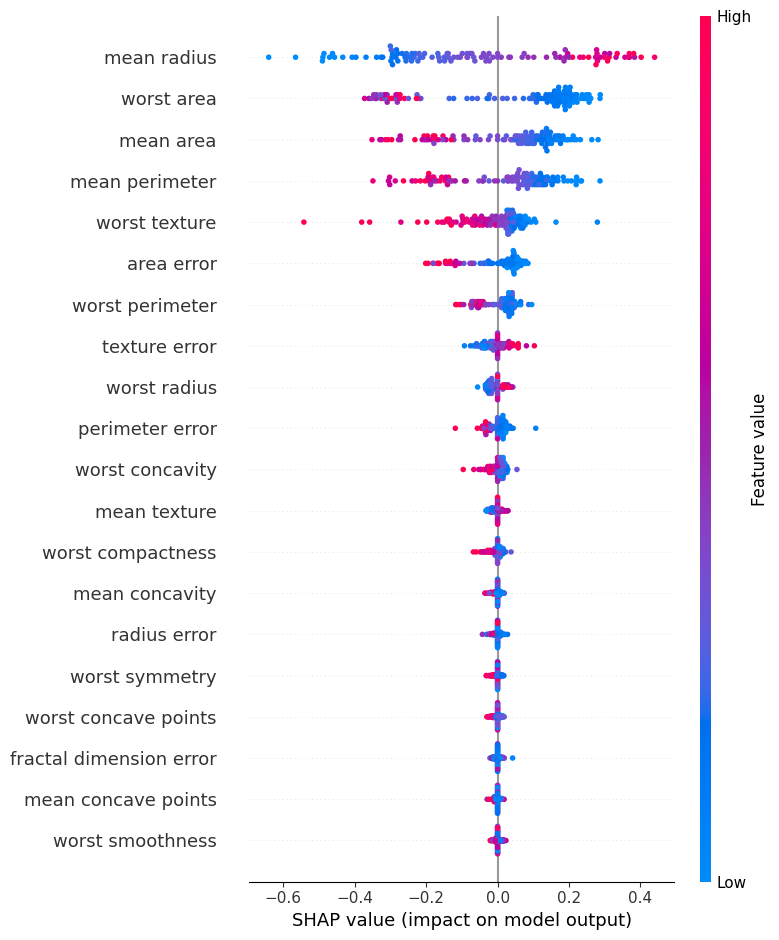

In [11]:
#visualizacao que ajuda a entender o impacto de cada feature no modelo, mostrando a importancia de cada uma das variaveis para a previsao final
shap.summary_plot(shap_values,x_test, feature_names = data["feature_names"])

In [12]:
mean_abs_shap_values = np.abs(shap_values).mean(axis = 0) #media do valor absoluto para cada feature

In [13]:
feature_names = data["feature_names"] #nome das features
feature_importance = zip(feature_names, mean_abs_shap_values) #combaincao do nome com sua iomportancia de media

In [14]:
sorted_feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse = True) #ordena na mai alta para a mais baixa

In [15]:
for feature, importance in sorted_feature_importance:
    print(feature, ":", importance)

mean radius : 0.22862376814823893
worst area : 0.19866988755229636
mean area : 0.14007537439994416
mean perimeter : 0.1288971397896111
worst texture : 0.07201316726190987
area error : 0.06067356679713648
worst perimeter : 0.03997709363958775
texture error : 0.02619072398399819
worst radius : 0.019937218395849363
perimeter error : 0.0189166757549297
worst concavity : 0.015778538951292248
mean texture : 0.012109890534847123
worst compactness : 0.011400305084464634
mean concavity : 0.007389447861668313
radius error : 0.006862716473340499
worst symmetry : 0.006527244621664162
worst concave points : 0.006297214403008869
fractal dimension error : 0.005675368524885184
mean concave points : 0.005417338595280963
worst smoothness : 0.005389636035158119
concavity error : 0.0053608999263577515
compactness error : 0.005267941623120039
mean compactness : 0.005160224403765298
symmetry error : 0.005154145275745423
smoothness error : 0.005052285379077868
mean symmetry : 0.004964334278214087
worst fract